**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab25-TH](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab25/Lab25-TH.ipynb)

___

# <font color=green>Exercise Set 25: "Probability-Magnitude Data Models"</font>


**Medrano, Giovanni**

**R11521018**

ENGR 1330 Exercise 25 

## Background

The first part of the exercise is identical to the lab, so simply cut-and-paste.  Once that is working, use the lesson examples to guide your analysis and select your favorite probability-magnitude model for the supplied data

### Important Terminology:
__Population:__ In statistics, a population is the entire pool from which a statistical sample is drawn. A population may refer to an entire group of people, objects, events, hospital visits, or measurements. <br>
__Sample:__ In statistics and quantitative research methodology, a sample is a set of individuals or objects collected or selected from a statistical population by a defined procedure. The elements of a sample are known as sample points, sampling units or observations.<br>
__Distribution (Data Model):__ A data distribution is a function or a listing which shows all the possible values (or intervals) of the data. It also (and this is important) tells you how often each value occurs. <br>

__*From https://www.investopedia.com/terms*__<br>
__*https://www.statisticshowto.com/data-distribution/*__

### Important Steps:
1. __Get descriptive statistics- mean, variance, std. dev.__
2. __Use plotting position formulas (e.g., weibull, gringorten, cunnane) and plot the SAMPLES (data you already have)__
3. __Use different data models (e.g., normal, log-normal, Gumbell) and find the one that better FITs your samples- Visual or Numerical__
4. __Use the data model that provides the best fit to infer about the POPULATION__

# Estimate the magnitude of the annual peak flow at Spring Ck near Spring, TX.

The file [08068500.pkf](http://54.243.252.9/engr-1330-webroot/4-Databases/08068500.pkf) is an actual WATSTORE formatted file for a USGS gage at Spring Creek, Texas. The first few lines of the file look like:

    Z08068500                       USGS 
    H08068500       3006370952610004848339SW12040102409    409     72.6             
    N08068500       Spring Ck nr Spring, TX
    Y08068500       
    308068500       19290530  483007              34.30        1879          
    308068500       19390603    838               13.75                    
    308068500       19400612   3420               21.42                    
    308068500       19401125  42700               33.60                    
    308068500       19420409  14200               27.78                    
    308068500       19430730   8000               25.09                    
    308068500       19440319   5260               23.15                    
    308068500       19450830  31100               32.79                    
    308068500       19460521  12200               27.97                 
    
The first column are some agency codes that identify the station , the second column after the fourth row is a date in YYYYMMDD format, the third column is a discharge in CFS, the fourth and fifth column are not relevant for this laboratory exercise.  The file was downloaded from

https://nwis.waterdata.usgs.gov/tx/nwis/peak?site_no=08068500&agency_cd=USGS&format=hn2

In the original file there are a couple of codes that are manually removed:

- 19290530  483007;  the trailing 7 is a code identifying a break in the series (non-sequential)
- 20170828  784009; the trailing 9 identifies the historical peak

The laboratory task is to fit the data models to this data, decide the best model from visual perspective, and report from that data model the magnitudes of peak flow associated with the probebilitiess below (i.e. populate the table)

|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |????| 75% chance of greater value|           
|50% |????| 50% chance of greater value|            
|75% |????| 25% chance of greater value|            
|90% |????| 10% chance of greater value|
|99% |????| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|????| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|????| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

The first step is to read the file, skipping the first part, then build a dataframe:


In [1]:
# Get the data file
# Read the data file
amatrix = [] # null list to store matrix reads
rowNumA = 0
matrix1=[]
col0=[]
col1=[]
col2=[]
with open('08068500.pkf','r') as afile:
    lines_after_4 = afile.readlines()[4:]
afile.close() # Disconnect the file
howmanyrows = len(lines_after_4)
for i in range(howmanyrows):
    matrix1.append(lines_after_4[i].strip().split())
for i in range(howmanyrows):
    col0.append(matrix1[i][0])
    col1.append(matrix1[i][1])
    col2.append(matrix1[i][2])
# col2 is date, col3 is peak flow
#now build a datafranem

In [4]:
import pandas 
df = pandas.DataFrame(col0)
df['date']= col1
df['date']=df['date'].astype(int)
df['flow']= col2
df['flow']=df['flow'].astype(int)

In [5]:
df.head()

,0,date,flow
0,308068500,19290530,48300
1,308068500,19390603,838
2,308068500,19400612,3420
3,308068500,19401125,42700
4,308068500,19420409,14200


In [6]:
df.describe()

,date,flow
count,8.000000e+01,80.000000
mean,1.977249e+07,11197.800000
std,2.338980e+05,15022.831582
min,1.929053e+07,381.000000
25%,1.957772e+07,3360.000000
50%,1.977552e+07,7190.000000
75%,1.997276e+07,11500.000000
max,2.017083e+07,78800.000000


Now explore if you can plot the dataframe as a plot of peaks versus date.

<AxesSubplot:>

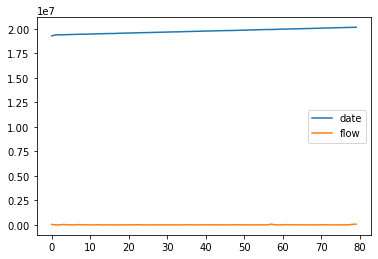

In [7]:
# Plot here+
df.plot()

From here on you can proceede using the lecture notebook as a go-by, although you should use functions as much as practical to keep your work concise

In [8]:
# Descriptive Statistics 
def normdensity(x,mu,sigma):
    weight = 1.0 /(sigma * math.sqrt(2.0*math.pi))
    argument = ((x - mu)**2)/(2.0*sigma**2)
    normdensity = weight*math.exp(-1.0*argument)
    return normdensity

def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

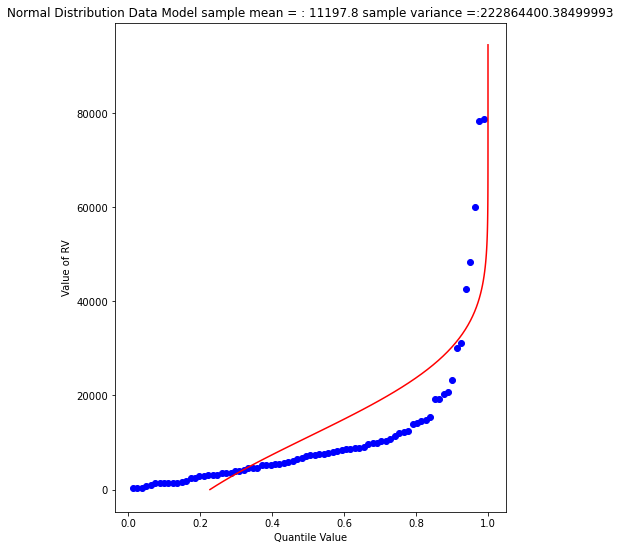

In [9]:
# Weibull Plotting Position Function
# Plot here
import numpy
import math
import matplotlib.pyplot # the python plotting library


sample = df['flow'].tolist() # put the peaks into a list
sample_mean = numpy.array(sample).mean()
sample_variance = numpy.array(sample).std()**2
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [10]:
df['flow'].describe()

count       80.000000
mean     11197.800000
std      15022.831582
min        381.000000
25%       3360.000000
50%       7190.000000
75%      11500.000000
max      78800.000000
Name: flow, dtype: float64

In [11]:
myguess = 8000
print(mu,sigma)
print(normdist(myguess,mu,sigma))

11197.8 14928.64362174273
0.41519334019257514


In [12]:
from scipy.optimize import newton

def f(x):
    mu = 11197.8
    sigma = 15022.831582
    quantile = 0.999
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))

57621.83948481428


## Normal Distribution Data Model
|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |1065| 75% chance of greater value|           
|50% |11197| 50% chance of greater value|            
|75% |21330| 25% chance of greater value|            
|90% |30450| 10% chance of greater value|
|99% |46146| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|54435 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|54621| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

<hr>

# LOG NORMAL DISTRIBUTION

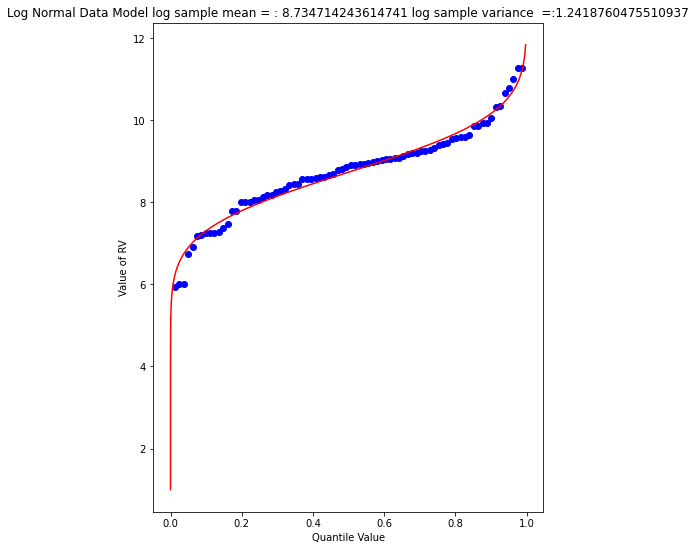

In [14]:
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))

logsample = df['flow'].apply(loggit).tolist() # put the peaks into a list
sample_mean = numpy.array(logsample).mean()
sample_variance = numpy.array(logsample).std()**2
logsample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, logsample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Normal Data Model log sample mean = : " + str(sample_mean)+ " log sample variance  =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

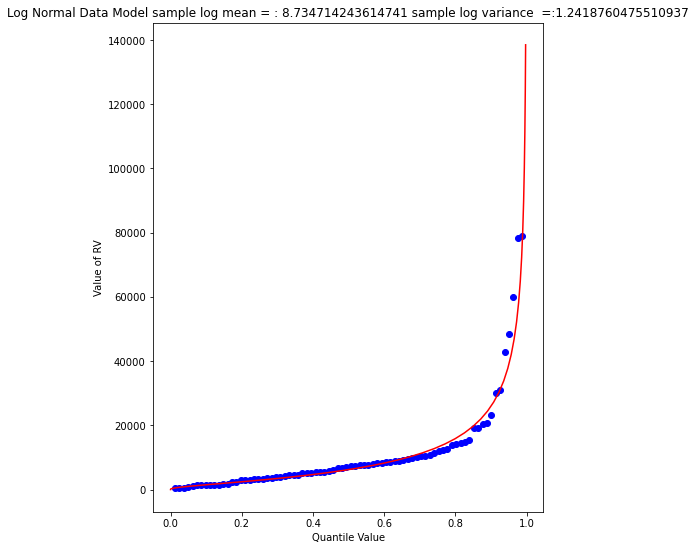

In [16]:
# Fitting Data to Normal Data Model 
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))

sample = df['flow'].tolist() # pull original list
sample.sort() # sort in place
################
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(antiloggit(xlow + i*xstep))
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Normal Data Model sample log mean = : " + str((sample_mean))+ " sample log variance  =:" + str((sample_variance))
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [32]:
# df['flow'].describe()

In [45]:
myguess = 1200
print(mu,sigma)
print(normdist(loggit(myguess),mu,sigma))

8.734714243614741 1.1143949244101454
0.06999718351959794


In [49]:

from scipy.optimize import newton

def f(x):
    mu = 7.23730905616488
    sigma = 0.4984855728993489
    quantile = 0.999
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))

6488.231508309042


## Log-Normal Distribution Data Model
|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |993| 75% chance of greater value|           
|50% |1390| 50% chance of greater value|            
|75% |1946| 25% chance of greater value|            
|90% |2633| 10% chance of greater value|
|99% |4433| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|5837| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|6488| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

<hr>

In [51]:
# Gumbell EV1 Quantile Function
def ev1dist(x,alpha,beta):
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist

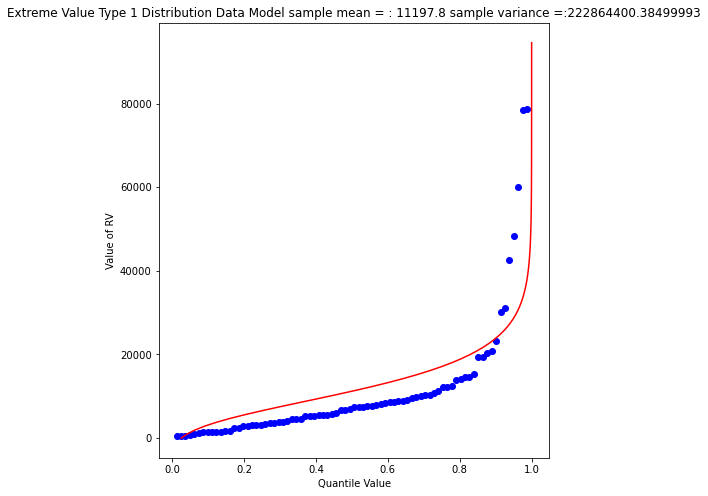

In [52]:
# Fitting Data to Gumbell EV1 Data Model 
sample = df['flow'].tolist() # put the peaks into a list
sample_mean = numpy.array(sample).mean()
sample_variance = numpy.array(sample).std()**2
alpha_mom = sample_mean*math.sqrt(6)/math.pi
beta_mom = math.sqrt(sample_variance)*0.45
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = ev1dist(xlow + i*xstep,alpha_mom,beta_mom)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Extreme Value Type 1 Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [66]:
myguess = 3000
print(alpha_mom,beta_mom)
print(ev1dist(myguess,alpha_mom,beta_mom)) # 

8730.888840854457 6717.889629784229
0.09566898459274582


In [71]:
from scipy.optimize import newton

def f(x):
    alpha = 1246.9363972503857
    beta = 445.4445561942363
    quantile = 0.999
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))

4323.7355666601925


## Gumbell Double Exponential (EV1) Distribution Data Model
|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |1101| 75% chance of greater value|           
|50% |1410| 50% chance of greater value|            
|75% |1801| 25% chance of greater value|            
|90% |2249| 10% chance of greater value|
|99% |3296| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|4014| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|4223| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

<hr>

In [86]:
# Gamma (Pearson Type III) Quantile Function
import scipy.stats # import scipy stats package
import math        # import math package
import numpy       # import numpy package
# log and antilog
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))
def weibull_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    weibull_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        weibull_pp.append((i+1)/(len(sample)+1))
    return weibull_pp

In [87]:
# Fitting Data to Pearson (Gamma) III Data Model 
def gammacdf(x,tau,alpha,beta): # Gamma Cumulative Density function - with three parameter to one parameter convert
    xhat = x-tau
    lamda = 1.0/beta
    gammacdf = scipy.stats.gamma.cdf(lamda*xhat, alpha)
    return gammacdf
# This is new, in lecture the fit was to log-Pearson, same procedure, but not log transformed

In [88]:
#sample = beargrass['Peak'].tolist() # put the peaks into a list
sample = df['flow'].apply(loggit).tolist() # put the log peaks into a list
sample_mean  = numpy.array(sample).mean()
sample_stdev = numpy.array(sample).std()
sample_skew  = 3.0 # scipy.stats.skew(sample)
sample_alpha = 4.0/(sample_skew**2)
sample_beta  = numpy.sign(sample_skew)*math.sqrt(sample_stdev**2/sample_alpha)
sample_tau   = sample_mean - sample_alpha*sample_beta

In [89]:
plotting = weibull_pp(sample)

In [90]:
x = []; ycdf = []
xlow = (0.9*min(sample)); xhigh = (1.1*max(sample)) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = gammacdf(xlow + i*xstep,sample_tau,sample_alpha,sample_beta)
    ycdf.append(yvalue) 

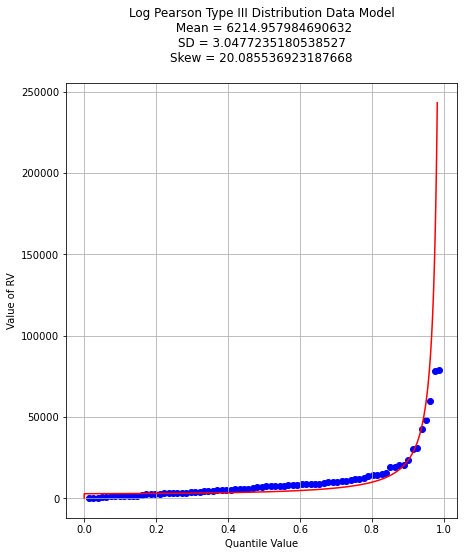

In [91]:
# reverse transform the peaks, and the data model peaks
for i in range(len(sample)):
    sample[i] = antiloggit(sample[i])
for i in range(len(x)):
    x[i] = antiloggit(x[i])
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(plotting, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Pearson Type III Distribution Data Model\n "
mytitle += "Mean = " + str(antiloggit(sample_mean)) + "\n"
mytitle += "SD = " + str(antiloggit(sample_stdev)) + "\n"
mytitle += "Skew = " + str(antiloggit(sample_skew)) + "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.grid(which="both")
matplotlib.pyplot.show()

In [92]:
print(sample_tau)
print(sample_alpha)
print(sample_beta)

7.991784294007978
0.4444444444444444
1.6715923866152183


In [112]:
from scipy.optimize import newton

def f(x):
    sample_tau = 5.976005311346212
    sample_alpha = 6.402272915026134
    sample_beta = 0.1970087438569494
    quantile = 0.999
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

myguess =  5000
print(newton(f, myguess))

11455.30820223422


In [ ]:
round(gammacdf(loggit(5856.109),sample_tau,sample_alpha,sample_beta),4)


## Pearson III Distribution Data Model 
|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |968| 75% chance of greater value|           
|50% |1302| 50% chance of greater value|            
|75% |1860| 25% chance of greater value|            
|90% |2706| 10% chance of greater value|
|99% |5856| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|9420| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|11455| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

<hr>

In [84]:
# Fitting Data to Log-Pearson (Log-Gamma) III Data Model 
from scipy.optimize import newton

def f(x):
    sample_tau = 5.976005311346212
    sample_alpha = 6.402272915026134
    sample_beta = 0.1970087438569494
    quantile = 0.50
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

myguess =  1000
print(newton(f, myguess))

1302.814639184079


## Log-Pearson III Distribution Data Model
|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |968| 75% chance of greater value|           
|50% |1302| 50% chance of greater value|            
|75% |1860| 25% chance of greater value|            
|90% |2706| 10% chance of greater value|
|99% |5836| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|9420| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|11455| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

<hr>

# Summary of "Best" Data Model based on Graphical Fit

# Overall the best model graphical fit seems to be Log-Person 3.